# Лабка №2

In [57]:
import matplotlib.pyplot as plt
import numpy as np
import cv2

(<Axes: >, <matplotlib.image.AxesImage at 0x21943c41f10>)

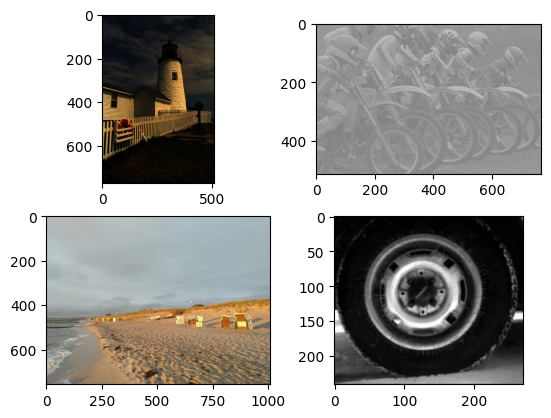

In [58]:
dark = cv2.imread("imgs/dark.png")
dark = cv2.cvtColor(dark, cv2.COLOR_BGR2RGB)

kodim05 = cv2.imread("imgs/kodim05.jpg")
kodim05 = cv2.cvtColor(kodim05, cv2.COLOR_BGR2RGB)

sea = cv2.imread("imgs/sea.jpg")
sea = cv2.cvtColor(sea, cv2.COLOR_BGR2RGB)

tire = cv2.imread("imgs/tire.png")
tire = cv2.cvtColor(tire, cv2.COLOR_BGR2RGB)

plt.subplot(221), plt.imshow(dark)
plt.subplot(222), plt.imshow(kodim05)
plt.subplot(223), plt.imshow(sea)
plt.subplot(224), plt.imshow(tire)

White patch function (input: img)

In [59]:
def white_patch(input_img: np.ndarray) -> np.ndarray:
    temp = cv2.cvtColor(input_img, cv2.COLOR_RGB2GRAY)
    # розгортаємо у 1D і сортуємо індекси за яскравістю
    flat_indices = np.argsort(temp.ravel())
    # беремо 10-й найяскравіший ([-10] – 10-й з кінця)
    idx = flat_indices[-10]
    coords = np.unravel_index(idx, temp.shape)

    # print("10-й найяскравіший піксель:", input_img[coords])

    # далі як у тебе
    coeffs = 255.0 / input_img[coords]
    balanced = np.zeros_like(input_img, dtype=np.float32)
    for channel in range(3):
        balanced[..., channel] = input_img[..., channel] * coeffs[channel]

    balanced /= 255
    balanced[balanced > 1] = 1
    return balanced


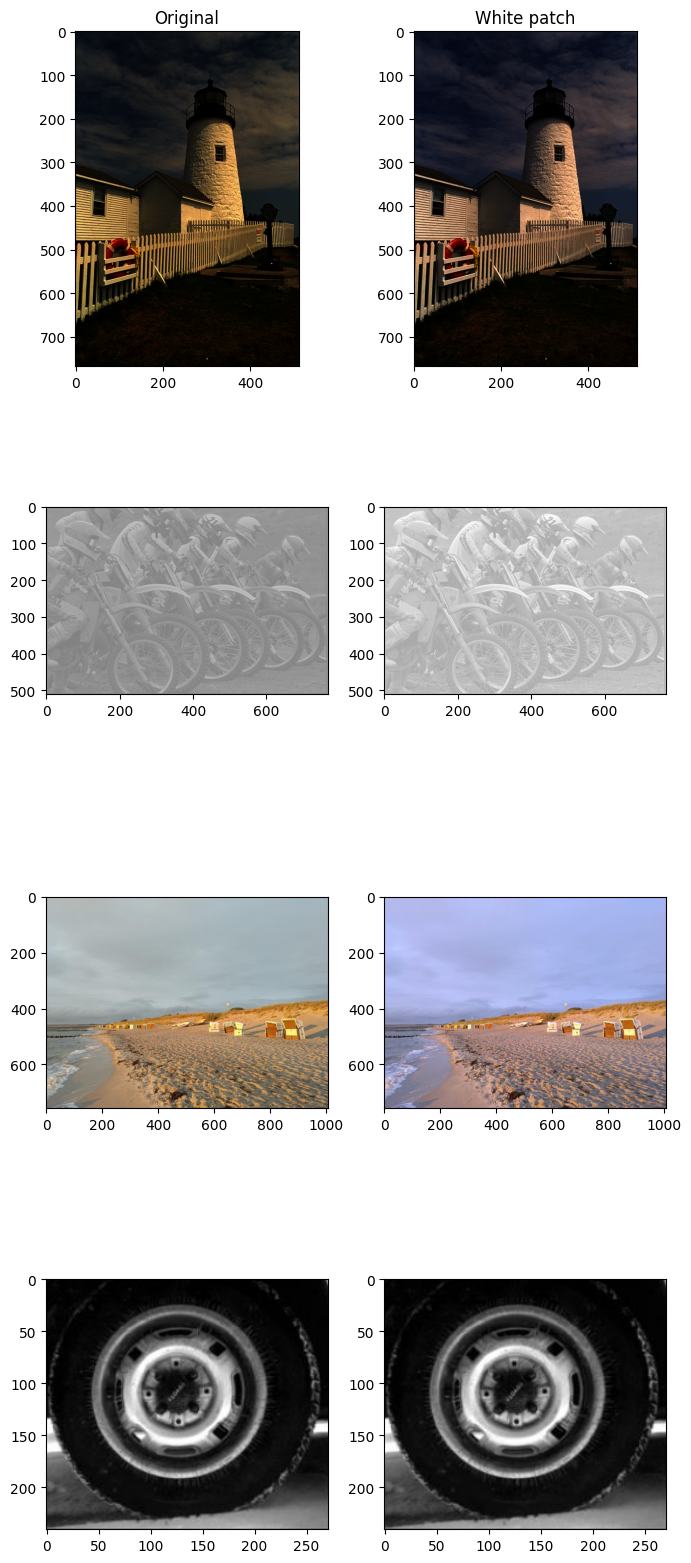

In [60]:
fig, axs = plt.subplots(nrows=4, ncols=2, figsize=(8, 20))

axs[0, 0].set_title("Original")
axs[0, 0].imshow(dark)
axs[1, 0].imshow(kodim05)
axs[2, 0].imshow(sea)
axs[3, 0].imshow(tire)

axs[0, 1].set_title("White patch")
axs[0, 1].imshow(white_patch(dark))
axs[1, 1].imshow(white_patch(kodim05))
axs[2, 1].imshow(white_patch(sea))
axs[3, 1].imshow(white_patch(tire))

Gray world (input: img)

In [61]:
def gray_world(input_img: np.ndarray) -> np.ndarray:
    mean_rgb = input_img.mean(axis=(0, 1))    
    m = input_img.mean()
    
    balanced = input_img * (m/mean_rgb)
    balanced = balanced.clip(0, 255).astype(int)
    return balanced

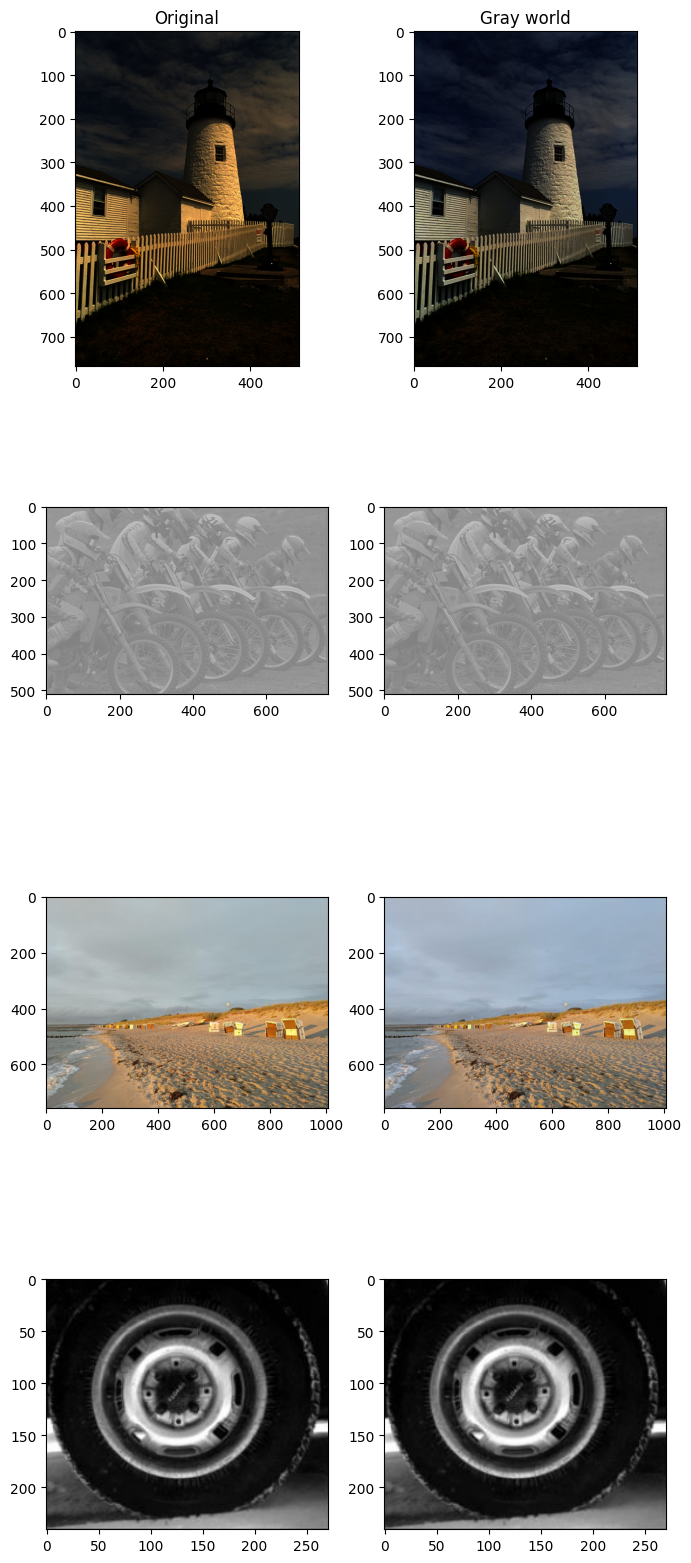

In [62]:
fig, axs = plt.subplots(nrows=4, ncols=2, figsize=(8, 20))

axs[0, 0].set_title("Original")
axs[0, 0].imshow(dark)
axs[1, 0].imshow(kodim05)
axs[2, 0].imshow(sea)
axs[3, 0].imshow(tire)

axs[0, 1].set_title("Gray world")
axs[0, 1].imshow(gray_world(dark))
axs[1, 1].imshow(gray_world(kodim05))
axs[2, 1].imshow(gray_world(sea))
axs[3, 1].imshow(gray_world(tire))

Scale-by-max (input: img)

In [74]:
def scale_by_max(input_img: np.ndarray) -> np.ndarray:
    max_rgb = input_img.max(axis=(0, 1))
    print(max_rgb)
    balanced = input_img * (255/max_rgb)
    
    balanced = balanced.clip(0, 255).astype(int)
    return balanced

[255 255 255]
[196 196 196]
[255 255 237]
[255 255 255]


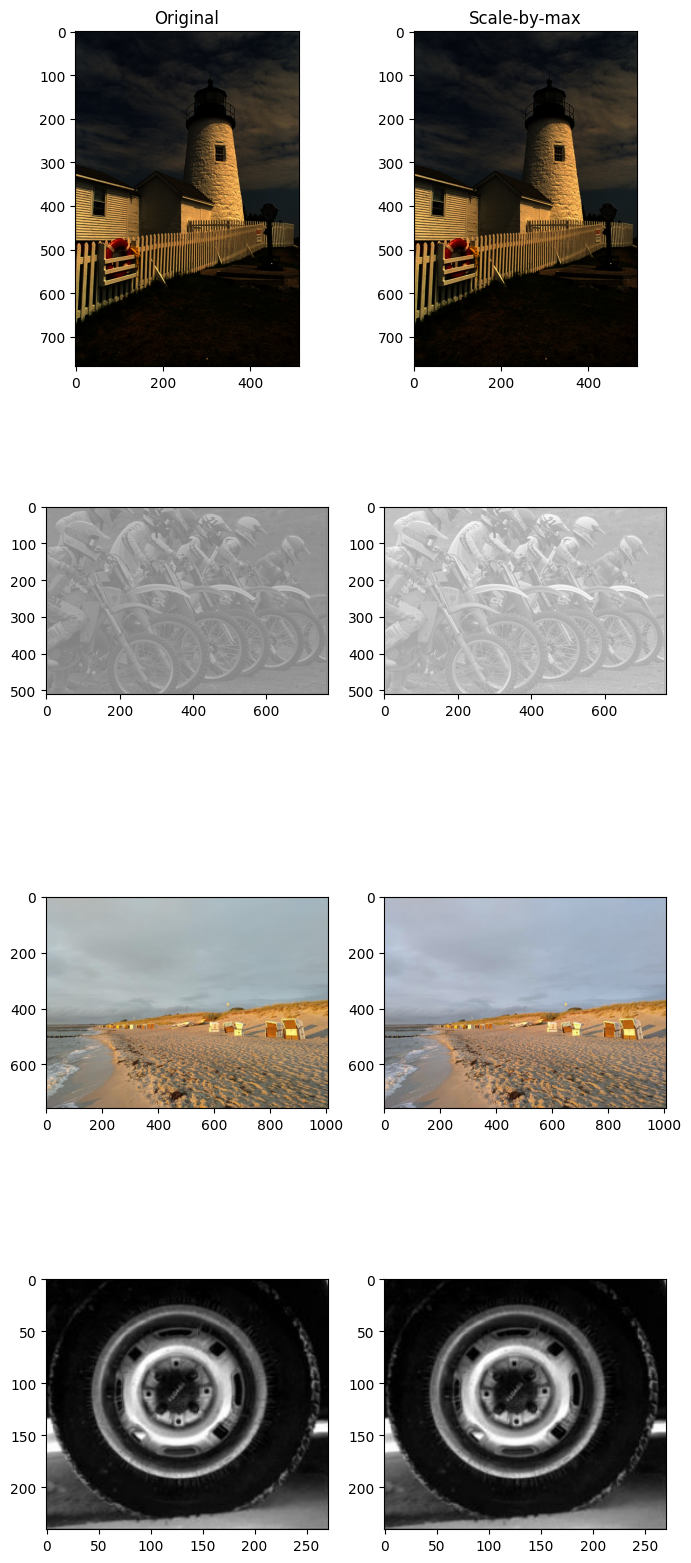

In [75]:
fig, axs = plt.subplots(nrows=4, ncols=2, figsize=(8, 20))

axs[0, 0].set_title("Original")
axs[0, 0].imshow(dark)
axs[1, 0].imshow(kodim05)
axs[2, 0].imshow(sea)
axs[3, 0].imshow(tire)

axs[0, 1].set_title("Scale-by-max")
axs[0, 1].imshow(scale_by_max(dark))
axs[1, 1].imshow(scale_by_max(kodim05))
axs[2, 1].imshow(scale_by_max(sea))
axs[3, 1].imshow(scale_by_max(tire))